In [117]:
!pip install pandas
!pip install numpy
!pip install nltk

In [118]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [119]:
consumerKey="pvLr4XiwUSu80NZh3wadD1sbn"
consumerSecret="nBD4e9IpMD9nKsNfeS2dEnkOctRpSWttZc5sceKX0NsrIp9155"
accessToken="1283034361898700801-Y8xmP577RTvysSXMFxT3dBtFcQ1vb8"
accessTokenSecret="lRuPCW5A6TtJAELLRsYbOXeOFaqMMMQwKphDvwBDO6ehh"
auth=tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api=tweepy.API(auth, wait_on_rate_limit = True)
tweets =api.user_timeline(screen_name="BarackObama",count= 100, lang="en", tweet_mode="extended")
print("show the 30 recent tweets: \n")
i=1
for tweet in tweets[0:30]:
    print(str(i) + ')'+ tweet.full_text + '\n')
    i=i+1


show the 30 recent tweets: 

1)Not many of us get to live to see our own legacy play out in such a meaningful, remarkable way. John Lewis did:

https://t.co/KbVfYt5CeQ

2)Some thoughts on the Reverend C.T. Vivian, a pioneer who pulled America closer to our founding ideals and a friend who I will miss greatly. https://t.co/kDsGhU2BF4

3)Here’s a quick look at how our response stacks up with countries around the world:

https://t.co/AEIlpub72e

4)The latest data offers a tragic reminder that the virus doesn’t care about spin or ideology––and that the best thing we can do for our economy is to deal with our public health crisis.

https://t.co/c1iGYA6pr3

5)Get registered and find out how you can vote by mail at https://t.co/JQJjdF7JxM.

6)Voting by mail shouldn't be a partisan issue––especially during a pandemic. Everybody should be able to request an absentee ballot, and make their voice heard in every election. https://t.co/enlhkichz3

7)It’s clear our communities are crying out for cha

In [120]:
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['tweets'])
df

,tweets
0,Not many of us get to live to see our own lega...
1,"Some thoughts on the Reverend C.T. Vivian, a p..."
2,Here’s a quick look at how our response stacks...
3,The latest data offers a tragic reminder that ...
4,Get registered and find out how you can vote b...
...,...
95,Some good news: states that started social dis...
96,Mayors have been working hard to help us get t...
97,"Through centuries of persecution, exile and st..."
98,Social distancing bends the curve and relieves...


In [121]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'http?:\/\/\S+','', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    
    
    return text
df['tidy_tweets']= df['tweets'].apply(cleanTxt)

df

,tweets,tidy_tweets
0,Not many of us get to live to see our own lega...,Not many of us get to live to see our own lega...
1,"Some thoughts on the Reverend C.T. Vivian, a p...","Some thoughts on the Reverend C.T. Vivian, a p..."
2,Here’s a quick look at how our response stacks...,Here’s a quick look at how our response stacks...
3,The latest data offers a tragic reminder that ...,The latest data offers a tragic reminder that ...
4,Get registered and find out how you can vote b...,Get registered and find out how you can vote b...
...,...,...
95,Some good news: states that started social dis...,Some good news: states that started social dis...
96,Mayors have been working hard to help us get t...,Mayors have been working hard to help us get t...
97,"Through centuries of persecution, exile and st...","Through centuries of persecution, exile and st..."
98,Social distancing bends the curve and relieves...,Social distancing bends the curve and relieves...


In [122]:
df['tidy_tweets'] = df['tidy_tweets'].str.replace('[^a-zA-Z#]+', ' ' )

In [123]:
df.head(12)

,tweets,tidy_tweets
0,Not many of us get to live to see our own lega...,Not many of us get to live to see our own lega...
1,"Some thoughts on the Reverend C.T. Vivian, a p...",Some thoughts on the Reverend C T Vivian a pio...
2,Here’s a quick look at how our response stacks...,Here s a quick look at how our response stacks...
3,The latest data offers a tragic reminder that ...,The latest data offers a tragic reminder that ...
4,Get registered and find out how you can vote b...,Get registered and find out how you can vote b...
5,Voting by mail shouldn't be a partisan issue––...,Voting by mail shouldn t be a partisan issue e...
6,It’s clear our communities are crying out for ...,It s clear our communities are crying out for ...
7,"Finally, here’s a look at how Germany reshaped...",Finally here s a look at how Germany reshaped ...
8,And here’s a counterbalance that argues for su...,And here s a counterbalance that argues for su...
9,Here’s a piece that outlines the need for a mo...,Here s a piece that outlines the need for a mo...


In [124]:
df['tidy_tweets'] = df['tidy_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]) )
df.head(12)

,tweets,tidy_tweets
0,Not many of us get to live to see our own lega...,many live legacy play such meaningful remarkab...
1,"Some thoughts on the Reverend C.T. Vivian, a p...",Some thoughts Reverend Vivian pioneer pulled A...
2,Here’s a quick look at how our response stacks...,Here quick look response stacks with countries...
3,The latest data offers a tragic reminder that ...,latest data offers tragic reminder that virus ...
4,Get registered and find out how you can vote b...,registered find vote mail
5,Voting by mail shouldn't be a partisan issue––...,Voting mail shouldn partisan issue especially ...
6,It’s clear our communities are crying out for ...,clear communities crying change what that chan...
7,"Finally, here’s a look at how Germany reshaped...",Finally here look Germany reshaped police trai...
8,And here’s a counterbalance that argues for su...,here counterbalance that argues substantial re...
9,Here’s a piece that outlines the need for a mo...,Here piece that outlines need more aggressive ...


In [125]:
tokenized_tweet = df['tidy_tweets'].apply(lambda x: x.split())

In [126]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [127]:
tokenized_tweet

0     [mani, live, legaci, play, such, meaning, rema...
1     [some, thought, reverend, vivian, pioneer, pul...
2     [here, quick, look, respons, stack, with, coun...
3     [latest, data, offer, tragic, remind, that, vi...
4                            [regist, find, vote, mail]
                            ...                        
95    [some, good, news, state, that, start, social,...
96    [mayor, have, been, work, hard, help, through,...
97    [through, centuri, persecut, exil, struggl, st...
98    [social, distanc, bend, curv, reliev, some, pr...
99    [advisor, friend, been, someon, turn, year, bo...
Name: tidy_tweets, Length: 100, dtype: object

In [128]:
for i in range (len(tokenized_tweet)):
    tokenized_tweet[i]= ' '.join(tokenized_tweet[i])

In [129]:
tokenized_tweet

0     mani live legaci play such meaning remark john...
1     some thought reverend vivian pioneer pull amer...
2     here quick look respons stack with countri aro...
3     latest data offer tragic remind that viru does...
4                                 regist find vote mail
                            ...                        
95    some good news state that start social distanc...
96    mayor have been work hard help through thi pan...
97    through centuri persecut exil struggl stori pa...
98    social distanc bend curv reliev some pressur h...
99    advisor friend been someon turn year book more...
Name: tidy_tweets, Length: 100, dtype: object

In [130]:
df['tidy_tweets']=tokenized_tweet

In [131]:
df.head(12)

,tweets,tidy_tweets
0,Not many of us get to live to see our own lega...,mani live legaci play such meaning remark john...
1,"Some thoughts on the Reverend C.T. Vivian, a p...",some thought reverend vivian pioneer pull amer...
2,Here’s a quick look at how our response stacks...,here quick look respons stack with countri aro...
3,The latest data offers a tragic reminder that ...,latest data offer tragic remind that viru does...
4,Get registered and find out how you can vote b...,regist find vote mail
5,Voting by mail shouldn't be a partisan issue––...,vote mail shouldn partisan issu especi dure pa...
6,It’s clear our communities are crying out for ...,clear commun cri chang what that chang look li...
7,"Finally, here’s a look at how Germany reshaped...",final here look germani reshap polic train aft...
8,And here’s a counterbalance that argues for su...,here counterbal that argu substanti reform pol...
9,Here’s a piece that outlines the need for a mo...,here piec that outlin need more aggress overha...


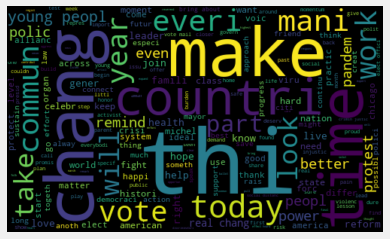

In [132]:
allWords = ' '.join( [tweet for tweet in df['tidy_tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


In [133]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

df['subjectivity']=df['tidy_tweets'].apply(getsubjectivity)
df['polarity']=df['tidy_tweets'].apply(getpolarity)
df

,tweets,tidy_tweets,subjectivity,polarity
0,Not many of us get to live to see our own lega...,mani live legaci play such meaning remark john...,0.500000,0.068182
1,"Some thoughts on the Reverend C.T. Vivian, a p...",some thought reverend vivian pioneer pull amer...,1.000000,0.900000
2,Here’s a quick look at how our response stacks...,here quick look respons stack with countri aro...,0.500000,0.333333
3,The latest data offers a tragic reminder that ...,latest data offer tragic remind that viru does...,0.504167,0.187500
4,Get registered and find out how you can vote b...,regist find vote mail,0.000000,0.000000
...,...,...,...,...
95,Some good news: states that started social dis...,some good news state that start social distanc...,0.244444,0.255556
96,Mayors have been working hard to help us get t...,mayor have been work hard help through thi pan...,0.445833,0.004167
97,"Through centuries of persecution, exile and st...",through centuri persecut exil struggl stori pa...,0.390000,0.266667
98,Social distancing bends the curve and relieves...,social distanc bend curv reliev some pressur h...,0.455556,0.244444


In [134]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis']=df['polarity'].apply(getAnalysis)
df


,tweets,tidy_tweets,subjectivity,polarity,Analysis
0,Not many of us get to live to see our own lega...,mani live legaci play such meaning remark john...,0.500000,0.068182,Positive
1,"Some thoughts on the Reverend C.T. Vivian, a p...",some thought reverend vivian pioneer pull amer...,1.000000,0.900000,Positive
2,Here’s a quick look at how our response stacks...,here quick look respons stack with countri aro...,0.500000,0.333333,Positive
3,The latest data offers a tragic reminder that ...,latest data offer tragic remind that viru does...,0.504167,0.187500,Positive
4,Get registered and find out how you can vote b...,regist find vote mail,0.000000,0.000000,Neutral
...,...,...,...,...,...
95,Some good news: states that started social dis...,some good news state that start social distanc...,0.244444,0.255556,Positive
96,Mayors have been working hard to help us get t...,mayor have been work hard help through thi pan...,0.445833,0.004167,Positive
97,"Through centuries of persecution, exile and st...",through centuri persecut exil struggl stori pa...,0.390000,0.266667,Positive
98,Social distancing bends the curve and relieves...,social distanc bend curv reliev some pressur h...,0.455556,0.244444,Positive


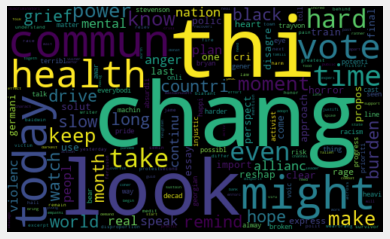

In [136]:
allWords = ' '.join( [tweet for tweet in df['tidy_tweets'][df['polarity'] < 0]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

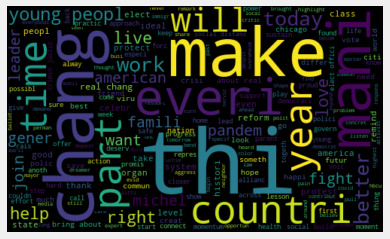

In [137]:
allWords = ' '.join( [tweet for tweet in df['tidy_tweets'][df['polarity'] > 0]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

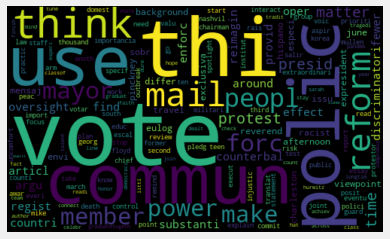

In [138]:
allWords = ' '.join( [tweet for tweet in df['tidy_tweets'][df['polarity'] == 0]])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [139]:
j=1
sortedDF = df.sort_values(by=['polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] =='Positive'):
        print(str(j) + ')'+sortedDF['tidy_tweets'][i])
        print()
        j=j+1

1)mani live legaci play such meaning remark john lewi

2)some thought reverend vivian pioneer pull america closer found ideal friend will miss greatli

3)here quick look respons stack with countri around world

4)latest data offer tragic remind that viru doesn care about spin ideolog that best thing economi deal with public health crisi

5)vote mail shouldn partisan issu especi dure pandem everybodi should abl request absente ballot make their voic heard everi elect

6)here piec that outlin need more aggress overhaul polic

7)long gerrymand contribut stall progress warp repres govern redistrict begin next year part protect restor democraci join fight fair map

8)found promis never been guarante each gener been call bring littl closer highest ideal histori call right whatev help expand that promis american

9)thi holiday weekend safe smart go take beat thi viru wear mask wash your hand listen expert folk tri divid that onli thi togeth

10)today tip giant negro leagu from satchel paig to

In [140]:
j=1
sortedDF = df.sort_values(by=['polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] =='Negative'):
        print(str(j) + ')'+sortedDF['tidy_tweets'][i])
        print()
        j=j+1

1)clear commun cri chang what that chang look like that import take hard look perspect propos there even one disagre with come with solut that last

2)final here look germani reshap polic train after horror world thi approach might use other countri today

3)here more essay that power express hope heart grief rage that drive thi moment potenti chang racism terribl black trayvon gener

4)today remind that progress might slow might take decad matter what thing might look like today alway possibl happi pride month everybodi

5)grief heavi burden bear even harder with eye world watch know that burden

6)georgian risk their health cast vote onli with absurdli long line broken vote machin

7)seen power that voic have when speak about injustic also know toll that take mental health today talk bryan stevenson allianc activist about way keep mental health prioriti thi time

8)nation violenc awar #wearorang honor victim survivor violenc which continu disproportion harm black commun then keep spe

<function matplotlib.pyplot.show(*args, **kw)>

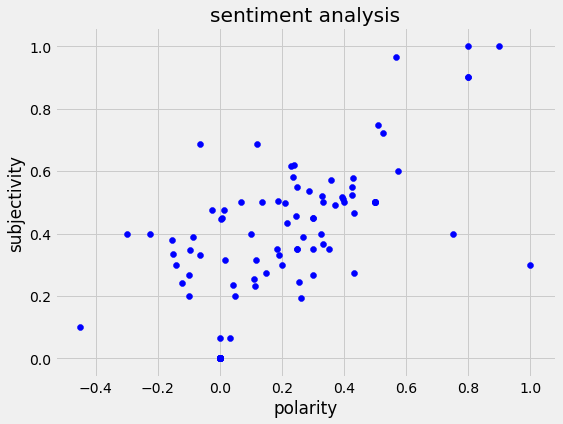

In [141]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue')
plt.title('sentiment analysis')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show

In [142]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tidy_tweets']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

67.0

In [143]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tidy_tweets']

round( (ntweets.shape[0] / df.shape[0]) *100, 1)

14.0

<function matplotlib.pyplot.show(*args, **kw)>

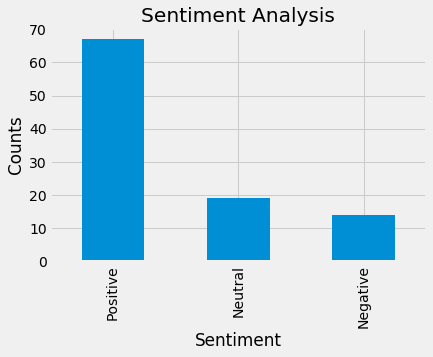

In [144]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind ='bar')
plt.show

In [145]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#[A-Za-z0-9]+', i)
        hashtags.append(ht)
    return hashtags

In [93]:
HT_regular = hashtag_extract(df['tidy_tweets'])

HT_regular

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['#wearorang'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['#graduatetogeth', '#classof2020'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]